# Installation

In [ ]:
!pip install numpy pandas matplotlib scikit-learn

# Importing

In [23]:
from sklearn import datasets
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Loading Dataset

In [6]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Features

In [8]:
X = df[['sepal_length']].values  # Features
y = iris.target     # Target

In [27]:
iris_df = pd.DataFrame(data=X, columns=['Sepal Length'])
iris_df['Species'] = y

# Let's take 'Setosa' vs. 'Non-setosa' for binary classification
iris_df['Binary Species'] = iris_df['Species'].apply(lambda x: 1 if x == 0 else 0)

In [28]:
iris_df.head()

,Sepal Length,Species,Binary Species
0,5.1,1,0
1,4.9,1,0
2,4.7,1,0
3,4.6,1,0
4,5.0,1,0


In [11]:
X = iris_df[['Sepal Length']].values
y = iris_df['Binary Species'].values

# Model Building

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Visualization

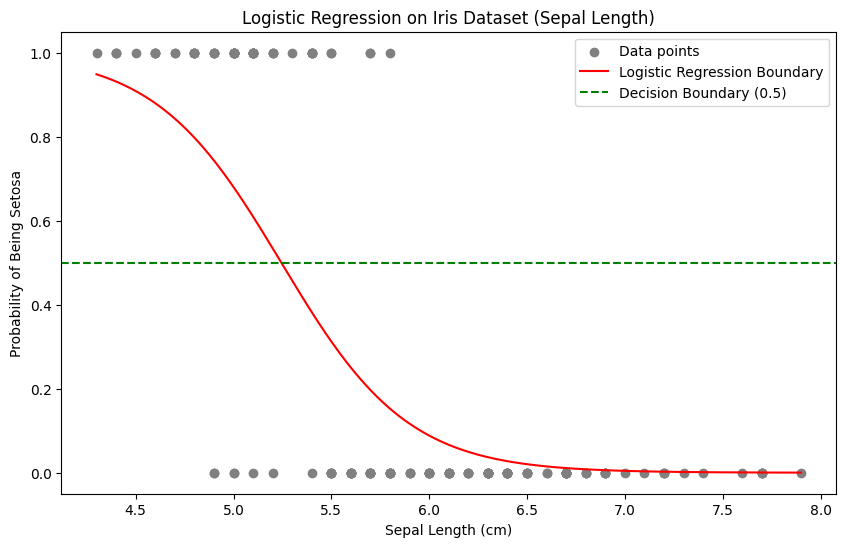

In [24]:
plt.figure(figsize=(10, 6))

plt.scatter(X, y, color='gray', label='Data points')

x_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_proba = model.predict_proba(x_range)[:, 1]
plt.plot(x_range, y_proba, color='red', label='Logistic Regression Boundary')

plt.title('Logistic Regression on Iris Dataset (Sepal Length)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Probability of Being Setosa')
plt.axhline(0.5, color='green', linestyle='--', label='Decision Boundary (0.5)')
plt.legend()
plt.show()